In [1]:
import requests
from bs4 import BeautifulSoup 
from lxml import etree 
import pandas as pd

#PREPROCESSAMENTO

In [2]:
dataSet = pd.read_csv('armazem/baseDados/baseDados.csv',encoding='utf-8')


In [3]:
dataSet

Unnamed: 0                                          headline  texto_path  \
0            0  Operação da GLO não deve impactar comércio ext...              
1            1  Entenda como vai funcionar a GLO nos portos e ...              
2            2  Lula diz que ação das Forças Armadas vai tirar...              
3            3  Especialistas veem  com ceticismo GLO do gover...              
4            4  GLO: Marinha usa blindado levado ao Haiti e na...              
5            5  Presidente do Porto de Santos fala em “ação su...              
6            6  Lula diz que GLO no Rio e em SP é para 'defini...              
7            7  Comandante da Marinha defende GLO e diz que op...              
8            8  Governo Lula batiza operação no Rio de “GLO do...              
9            9  Lula diz que GLO no Rio e em SP é para 'defini...              
10          10  GLO de Lula é ineficaz, contraproducente e env...              
11          11  Militares da FAB vão pedir câmeras corporais p...              
12          12  FAB vai mobilizar 600 militares para reforço d...              
13          13  Presidente do porto de Santos diz que GLO será...              
14          14  GLO pode causar custos e atrasos na liberação ...              
15          15  Auditores da Receita temem que militares invad...              
16          16  Navio da marinha realiza patrulha no Porto de ...              
17          17   A Tribuna acompanha inspeção em operação da G...              
18          18  Militares contra o crime: por que agora daria ...              
19          19  Marinha e PF apreendem 2 toneladas de drogas e...              
20          20  Ações do governo federal podem melhorar a segu...              
21          21  Na 1ª reunião, comitê da GLO expõe divergência...              
22          22  GLO é pirotecnia que não freará o crime organi...              
23          23  GLO: almirante fala grosso em reunião de comit...              
24          24  Marinha aborda mais de 500 embarcações na prim...              
25          25     “GLO do Mar” completa uma semana de atividades              
26          26  Marinha apreendeu seis embarcações na primeira...              
27          27  Governo Lula tenta debelar nova disputa entre ...              
28          28  Marinha do Brasil divulga como funcionam os si...              
29          29  Marinha apresenta sistemas que monitoram o trá...              
30          30  Marinha apresenta estrutura usada em operações...              
31          31  Marinha usa lanchas blindadas e navio com metr...              
32          32  Marinha aborda 125 embarcações no porto de san...              
33          33  Reforço Vital na ‘GLO do Mar’ e Resgate Heroic...              
34          34  Receita Federal e Marinha do Brasil intensific...              
35          35  Receita Federal e Marinha realizam ação de com...              
36          36  Marinha, Receita e Polícia Federal apertam o c...              
37          37  Novos blindados dos EUA reforçam Marinha em GL...              
38          38  GLO de portos e aeroportos é um show sem eficá...              
39          39  Marinha realiza quase 5 mil procedimentos em o...              
40          40  Marinhas do Brasil e EUA impõem prejuízo bilio...              
41          41  Marinha recebe novas viaturas blindadas para o...              
42          42  GLO, péssima ideia, por Manuel Domingos Neto e...              
43          43  Garantia de Lei e da Ordem nos Portos Brasilei...              
44          44  Militares da Marinha atuam em apreensão de dro...              
45          45  Operação Navegação Segura da Polícia Civil com...              
46          46  Ministério da Justiça quer replicar modelo de ...              
47          47  Marinha do Brasil e Receita Federal Ampliam Vi...              
48          48  Marinha do Brasil e Receita Federal ampliam vi...              
49  

In [6]:
dataSet['polaridade_headline'].count()

56

In [11]:
len(dataSet[dataSet['polaridade_headline']=='positivo'])

33

In [12]:
len(dataSet[dataSet['polaridade_headline']=='negativo'])

13

In [13]:
len(dataSet[dataSet['polaridade_headline']=='neutro'])

10

In [14]:
len(dataSet[dataSet['polaridade_texto']=='positivo'])

40

In [16]:
(33/40)*100

82.5

In [ ]:
(33/40)*100

In [8]:
dataSet['url'][49]

'https://www.marinha.mil.br/agenciadenoticias/acao-interagencias-resulta-em-nova-apreensao-de-drogas-no-porto-de-santos'

In [5]:
a=[x+1 for x  in range(55)]

In [6]:
dataSet['identificador'] = [x+1 for x  in range(56)]

In [7]:
dataSet.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [8]:
dataSet.columns

Index(['headline ', 'texto_path', 'url', 'fonte', 'grupo empresarial',
       'local_fonte', 'autores', 'data', 'polaridade_headline',
       'polaridade_texto', 'vies_politico',
       'noticia com protgonismo naval GLO Marinha', 'alcance', 'fratricidio',
       'identificador'],
      dtype='object')

In [9]:
url =dataSet['url']

In [10]:
# dataSet.to_csv("armazem/baseDados/baseDados.csv")

In [11]:
paginaWeb = requests.get(url[0])

In [12]:
paginaWeb.status_code

200

In [13]:
paginaWeb.content

b'\xef\xbb\xbf<!DOCTYPE html>\r\n<html lang="pt-BR">\r\n<head>\r\n    <meta property="og:type" content="article"/><meta property="og:site_name" content="A Tribuna"/><meta property="og:locale" content="pt_BR"/><meta name="twitter:card" content="summary_large_image"/><meta name="twitter:site" content="@atribunasantos"/><meta name="twitter:creator" content="@atribunasantos"/><meta name="twitter:domain" content="https://www.atribuna.com.br"/><meta property="fb:app_id" content="312042632854921"/><meta property="article:publisher" content="https://www.facebook.com/grupo.tribuna"/><meta property="article:author" content="https://www.facebook.com/grupo.tribuna"/><title>Opera\xc3\xa7\xc3\xa3o da GLO n\xc3\xa3o deve impactar com\xc3\xa9rcio exterior no Porto de Santos</title><meta name="description" content="Especialistas, no entanto, acreditam que poder\xc3\xa1 gerar algum atraso no desembara\xc3\xa7o aduaneiro"/><meta name="robots" content="index, follow"/><link rel="canonical" href="https://w

In [14]:
soup = BeautifulSoup(paginaWeb.text, "html.parser") 
# dom = etree.HTML(str(soup)) 
# print(dom.xpath('/html/body/div[1]/main/div[2]/div/div[1]/article/h1')) 

In [15]:
for para in soup.find_all("p"): 
    print(para.get_text()) 

Domingo, 14 de  Janeiro de 2024
Deflagrada na última segunda-feira, a Operação Lais de Guia, da Garantia da Lei e da Ordem (GLO), decretada pelo Governo Federal, não deve afetar as exportações e importações no Porto de Santos, mas poderá gerar algum atraso no desembaraço aduaneiro, segundo especialistas. A ação é executada por 535 fuzileiros navais, com o objetivo de combater o tráfico internacional de drogas e de armas, entre outras atividades ilícitas.
Clique aqui para seguir agora o novo canal de A Tribuna no WhatsApp!
Advogado especialista em Direito Marítimo, Larry Carvalho afirma que “os portos e aeroportos brasileiros escoam para a Europa drogas produzidas na América Latina”. Segundo ele, com a GLO, ocorrerá uma fiscalização mais detalhada das mercadorias e navios no País. “O que pode gerar maior demora na liberação de mercadorias, e, assim, maior aumento do custo logístico”.
Especializado em Governança Corporativa, o advogado Emanuel Pessoa entende que não é papel das Forças Ar

In [23]:
from armazem import CriadorArqConteudo
from armazem import CriadorArqHtml
from fabrica import FabArqHtml

In [16]:

def raspagem():  

    for n in range(inicio,len(dataSet['url'])):
        paginaWeb = requests.get(dataSet['url'][n])
        soup = BeautifulSoup(paginaWeb.text, "html.parser") 
        arm1 = FabArqHtml.criar(obj=CriadorArqHtml , identificador=n+1 , conteudo=paginaWeb.content)
        arm1.executarArmazenamento()
        print(soup)
    return n
    

try:
    raspagem()
except Exception as error:
    print(error.args)

except SSLError as error2:
    print("garrou")
 

    
    

("name 'inicio' is not defined",)


In [43]:
url[50]

'https://www.marinha.mil.br/agenciadenoticias/marinha-realiza-operacao-de-combate-ilicitos-em-ilha-da-baia-de-guanabara'

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By


In [36]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [35]:
driver.title

''

In [18]:
raspagem = driver.find_element(By.XPATH, "/html/body/div[1]/main/div[2]/div/div[1]/article/h1")

In [22]:
rasp2= driver.find_element(By.CSS_SELECTOR,"#fruits .tomatoes")


{'height': 96, 'width': 680}

In [15]:
import urllib
import requests as req

In [16]:
b= req.get('https://www.marinha.mil.br/agenciadenoticias/acao-interagencias-resulta-em-nova-apreensao-de-drogas-no-porto-de-santos')

ConnectionError: HTTPSConnectionPool(host='www.marinha.mil.br', port=443): Max retries exceeded with url: /agenciadenoticias/acao-interagencias-resulta-em-nova-apreensao-de-drogas-no-porto-de-santos (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7ff1ee6d36a0>: Failed to resolve 'www.marinha.mil.br' ([Errno -3] Temporary failure in name resolution)"))

In [14]:
with urllib.request.urlopen('https://realpython.com/urllib-request/') as res:
    rep = res.read()

HTTPError: HTTP Error 403: Forbidden

In [37]:
from matplotlib import pyplot as plt
from scipy.stats import norm 
import numpy as np

In [46]:
grupo1 = np.array([10,5,3,6,4])
sum(grupo1)

28

In [63]:
grupo2= np.array([6,5,7,7,3])
sum(grupo2)

28

In [58]:
grupo3= np.array([5.6,5.6,5.6,5.6,5.6])
sum(grupo3)

28.0

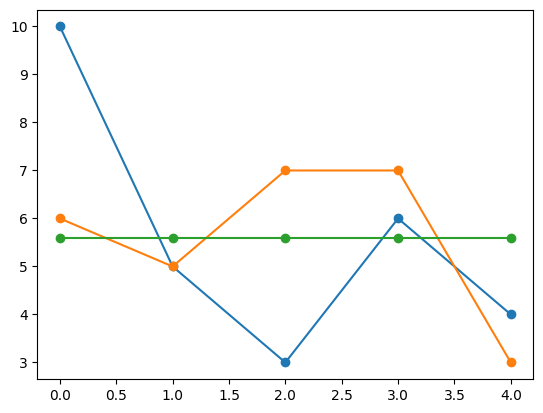

In [59]:
pyplot.plot(grupo1,'o-')
pyplot.plot(grupo2,'o-')
pyplot.plot(grupo3,'o-')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb575633be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb575668160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb575633940>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb5756686a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb575668940>,
 'means': []}

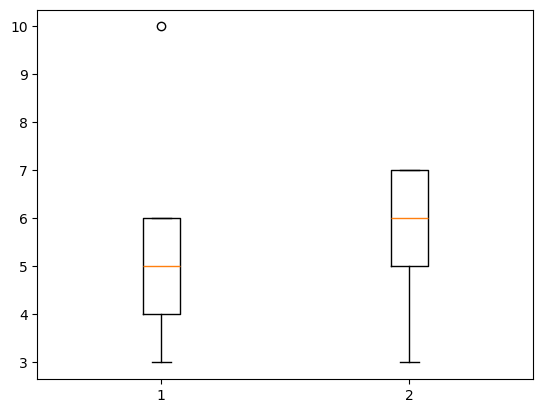

In [56]:
pyplot.boxplot([grupo1,grupo2])


In [51]:
grupo1.std(),grupo1.mean()

(2.4166091947189146, 5.6)

In [52]:
grupo2.std(),grupo2.mean()

(1.4966629547095764, 5.6)

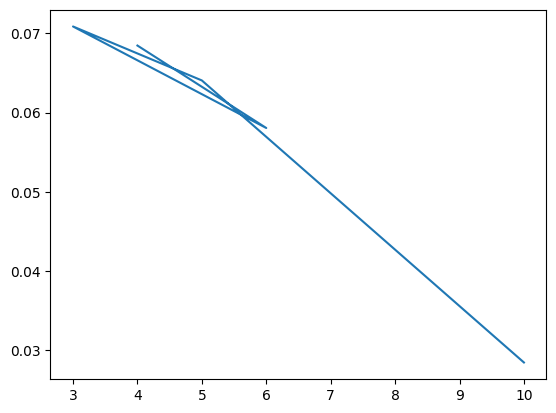

In [55]:
plt.plot(grupo1, norm.pdf(grupo1,grupo1.std(),grupo1.mean())) 
plt.show() 